In [3]:
# gcd
def divisors(a):
    res = [x for x in range(1,a+1) if a % x == 0]
    return res

def gcd(a,b):
    if b > a:
        c = a
        a = b
        b = c
    an = a
    bn = b
    rn = 1
    while rn > 0:
        rn = an % bn
        an = bn
        bn = rn
    return an

def gcd_iter(u, v):
    while v:
        u, v = v, u % v
    return abs(u)

def gcd_bin(u, v):
    u, v = abs(u), abs(v) # u >= 0, v >= 0
    if u < v:
        u, v = v, u # u >= v >= 0
    if v == 0:
        return u
    # u >= v > 0
    k = 1
    while u & 1 == 0 and v & 1 == 0: # u, v - even
        u >>= 1; v >>= 1
        k <<= 1
    t = -v if u & 1 else u
    while t:
        while t & 1 == 0:
            t >>= 1
        if t > 0:
            u = t
        else:
            v = -t
        t = u - v
    return u * k

def redfrac(num, denom): # reduce fraction
    ndgcd = gcd_bin(num, denom)
    return [ num / ndgcd, denom / ndgcd ]

if __name__=='__main__':
    #print gcd(24,16)
    print redfrac(234, 766)

[117, 383]


[0.08382021562346303, 0.0006797843764586933]
[151.06324018134035, 1.4598598186598166]
[265.3529396030364, 3.539460396963727]


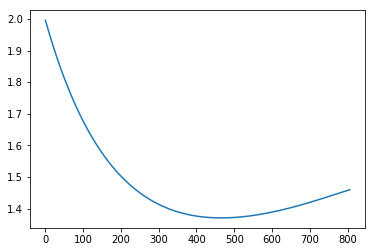

In [67]:
# drums with saltwater
import matplotlib.pyplot as plt

def dmdt0(totw,wslt,loss): # return updated mass for this drum
    return [loss*(totw-wslt)/totw, loss*wslt/totw]

if __name__ == '__main__':
    drum0 = [40.*8.33, 3.]
    drum1 = [10.*8.33, 2.]
    drum2 = [0., 0.]
    x = []
    y = []
    for i in range(807):
        d0 = dmdt0(drum0[0], drum0[1], 5.*8.33/100.)
        drum0[0] -= d0[0]
        drum0[1] -= d0[1]
        d1 = dmdt0(drum1[0], drum1[1], 4.*8.33/100.)
        #print d0
        drum1[0] += d0[0] - d1[0]
        drum1[1] += d0[1] - d1[1]
        drum2[0] += d1[0]
        drum2[1] += d1[1]
        x.append(i)
        y.append(drum1[1])
    print drum0
    print drum1
    print drum2
    #x = [n for n in range(1, nsmax)]
    #y = [mindh[n] for n in range(1, nsmax) if mindh.has_key(n)]
    _ = plt.plot(x, y, '-')
    plt.show()

In [20]:
# Bayesian decision
import math

def likeh(i,j): # likelihood ratio coin tosses 2 theories
    nomin = 6.*math.factorial(i+1)*math.factorial(j+1)/math.factorial(i+j+3)
    return nomin / (3./4.)**i / (1./4.)**j

if __name__ == '__main__':
    for i in range(1,10):
        print 'heads: %d tails: %d likelihood: %f' % (i,10-i,likeh(i,10-i))

heads: 1 tails: 9 likelihood: 2444.233100
heads: 2 tails: 8 likelihood: 244.423310
heads: 3 tails: 7 likelihood: 36.210861
heads: 4 tails: 6 likelihood: 7.543929
heads: 5 tails: 5 likelihood: 2.155408
heads: 6 tails: 4 likelihood: 0.838214
heads: 7 tails: 3 likelihood: 0.447048
heads: 8 tails: 2 likelihood: 0.335286
heads: 9 tails: 1 likelihood: 0.372540


In [4]:
# determinants
import numpy as np

a = np.array([[1, 2, 3, 4, 5], [2, 4, 6, 8, 10], [3, 6, 9, 12, 15], [4, 8, 12, 16, 20], [5, 10, 15, 20, 25]])
print np.linalg.det(a)
b = np.array([[1, -2, 3, -4, 5], [-2, 4, -6, 8, -10], [3, -6, 9, -12, 15], [-4, 8, -12, 16, -20], [5, -10, 15, -20, 25]])
print np.linalg.det(b)

0.0
0.0


In [3]:
# Viterbi algorithm: finding the most likely sequence of hidden states

def viterbi(obs, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][obs[0]], "prev": None}
    # Run Viterbi when t > 0
    for t in range(1, len(obs)): # for each observation
        V.append({})
        for st in states: # for each state
            max_tr_prob = V[t-1][states[0]]["prob"]*trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t-1][prev_st]["prob"]*trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st
                    
            max_prob = max_tr_prob * emit_p[st][obs[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
                    
    for line in dptable(V):
        print line
    opt = []
    # The highest probability
    max_prob = max(value["prob"] for value in V[-1].values())
    previous = None
    # Get most probable state and its backtrack
    for st, data in V[-1].items():
        if data["prob"] == max_prob:
            opt.append(st)
            previous = st
            break
    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]
    print 'The steps of states are ' + ' '.join(opt) + ' with highest probability of %s' % max_prob

def dptable(V):
    # Print a table of steps from dictionary
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)

if __name__ == '__main__':
    obs = ('normal', 'cold', 'dizzy')
    states = ('Healthy', 'Fever')
    start_p = {'Healthy': 0.6, 'Fever': 0.4}
    trans_p = {
       'Healthy' : {'Healthy': 0.7, 'Fever': 0.3},
       'Fever' : {'Healthy': 0.4, 'Fever': 0.6}
       }
    emit_p = {
       'Healthy' : {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
       'Fever' : {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6}
       }
    viterbi(obs, states, start_p, trans_p, emit_p)

           0            1            2
Healthy: 0.30000 0.08400 0.00588
Fever: 0.04000 0.02700 0.01512
The steps of states are Healthy Healthy Fever with highest probability of 0.01512


In [24]:
# cross entropy and perplexity
import numpy as np

def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions. 
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray        
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon) # clip - limit the values in an array
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

def perplexity(predictions, targets, epsilon=1e-12): # perplexity = 2 ^ H(p,q)
    return 2.**cross_entropy(predictions, targets)

if __name__ == '__main__':
    predictions = np.array([[0.25,0.25,0.25,0.25],
                            [0.01,0.01,0.01,0.96]])
    targets = np.array([[0,0,0,1],
                       [0,0,0,1]])
    ans = 0.71355817782  # Correct answer
    x = cross_entropy(predictions, targets)
    print x
    print perplexity(predictions, targets)
    print np.isclose(x,ans) # isclose: returns a boolean array where two arrays are element-wise equal within a tolerance

0.7135581752992395
1.6398435441458303
True


In [9]:
# info gain and purity
import math

def entropy(na,nb): # entropy of two sets with na, nb instances
    nsum = na + nb
    fa = float(na)/float(nsum)
    fb = float(nb)/float(nsum)
    return -fa*math.log(fa, 2.)-fb*math.log(fb, 2.)

if __name__ == '__main__':
    print 'parent entropy: %f' % (entropy(8,7))
    print 'child1 entropy: %f' % (entropy(6,1))
    print 'child2 entropy: %f' % (entropy(2,6))
    print 'info gain: %f' % (entropy(8,7)-(entropy(6,1)*7./15.+entropy(2,6)*8./15.))

parent entropy: 0.996792
child1 entropy: 0.591673
child2 entropy: 0.811278
info gain: 0.287996


In [3]:
# a prime 11111...

def n11(n):
    res = 0
    for i in range(n):
        res += 10**i
    return res

def primes(n): # primes up to n via sieve
    res = range(2, n+1)
    idx = range(2, n+1)
    for k in res:
        for i in range(k, n, k):
            if i % k == 0 and i > k:
                idx[i-2] = 0
    return idx

if __name__ == '__main__':
    #print n11(4)
    lp = primes(120000)
    for n in range(1,6):
        if n11(n) in lp:
            print n

1111
2


In [2]:
# sum of divisors = 2018
def divisors(a):
    res = [x for x in range(1,a+1) if a % x == 0]
    return res

if __name__ == '__main__':
    #print sum(divisors(2017))
    for k in range(100,2018):
        sdiv = sum(divisors(k))
        if sdiv == 2018:
            print k

2017


In [19]:
# decision tree
import json
import pandas as pd

with open('golf0.json') as f:
    #data = json.load(f)
    df = pd.read_json('golf0.json', orient='records')

#print data
#print data["day"][0]["play"]
print df["day"][0]["play"]

n


In [26]:
# truth tables

def ttable(n):
    res = []
    for k in range(1,n+1):
        res.append(['t' if i%(2**k)<2**(k-1) else 'f' for i in range(2**n)])
    return res

if __name__ == '__main__':
    print ttable(4)

[['t', 'f', 't', 'f', 't', 'f', 't', 'f', 't', 'f', 't', 'f', 't', 'f', 't', 'f'], ['t', 't', 'f', 'f', 't', 't', 'f', 'f', 't', 't', 'f', 'f', 't', 't', 'f', 'f'], ['t', 't', 't', 't', 'f', 'f', 'f', 'f', 't', 't', 't', 't', 'f', 'f', 'f', 'f'], ['t', 't', 't', 't', 't', 't', 't', 't', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f']]


In [34]:
# find all such numbers which are divisible by 7 but are not a multiple of 5
import time

def div7not5(a,b):
    res = []
    for p in range(a,b+1):
        if (p%7==0) and (p%5!=0):
            res.append(p)
    return res

def div7not5f(a,b):
    res = []
    while a%7!=0:
        a += 1
    for p in range(a,b+1,7):
        if p%5!=0:
            res.append(p)
    return res

if __name__ == '__main__':
    start = time.time()
    for i in range(5000):
        l = div7not5(2000, 3200)
    end = time.time()
    print(end - start)
    start = time.time()
    for i in range(5000):
        l = div7not5f(2000, 3200)
    end = time.time()
    print(end - start)

0.342000007629
0.0789999961853


In [14]:
# sum over rationals

def divisors(a):
    res = [x for x in range(1,a+1) if a % x == 0]
    return res

def gcd(a,b):
    if b > a:
        c = a
        a = b
        b = c
    an = a
    bn = b
    rn = 1
    while rn > 0:
        rn = an % bn
        an = bn
        bn = rn
    return an

def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def f(a,b):
    g = gcd(a,b)
    if g > 1:
        a /= g
        b /= g
    return a**2 * b**2

def fsum(al,au):
    res = 0.
    for a in range(al,au):
        for b in range(al,a-1):
            res += 1. / float(f(a,b))
    return res

if __name__ == '__main__':
    arr, s = [0.0], 0
    for a in range(1,50):
        for b in [d for d in range(1,50) if (a/float(d)) not in arr]:
            arr.append(a/float(b)) # useful to don't compute several times the same number (ex: 1/1, 2/2, ...)
            s+=1/float(((a*b)**2))
    print s

2.44505876736


In [15]:
l = [0,1,2,3,4]
print l[-1:]
print l[:-1]

[4]
[0, 1, 2, 3]


In [2]:
# integer sum of squares - power representations

def listsqrs(n):
    return [i**2 for i in range(1,n+1)]

def ctcomb(lsn, show): # count how often n = x^2+y^2 for highest in lsn = power representation k=2
    tgt = 2*lsn[len(lsn)/2]
    ctr = 0
    for a in lsn[1:]:
        b = tgt - a
        if b in lsn:
            ctr += 1
            if show:
                print 'a: %d b: %d' % (a,b)
    return ctr

if __name__ == '__main__':
    #print listsqrs(9)
    #print ctcomb(listsqrs(231))
    nmax = 2500
    ls = listsqrs(nmax)
    kmax = 0
    for k in range(1,nmax):
        tc = ctcomb(ls[0:k], False)
        if tc > 9:
            kmax = tc
            print 'k: %d : %d -> %d' % (k, 2*ls[k/2], tc)
    #print ctcomb(ls[0:2208], True)

k: 648 : 211250 -> 15
k: 649 : 211250 -> 15
k: 848 : 361250 -> 15
k: 849 : 361250 -> 15
k: 1298 : 845000 -> 15
k: 1299 : 845000 -> 15
k: 1448 : 1051250 -> 15
k: 1449 : 1051250 -> 15
k: 1688 : 1428050 -> 15
k: 1689 : 1428050 -> 15
k: 1698 : 1445000 -> 15
k: 1699 : 1445000 -> 15
k: 1848 : 1711250 -> 15
k: 1849 : 1711250 -> 15
k: 1948 : 1901250 -> 15
k: 1949 : 1901250 -> 15
k: 2048 : 2101250 -> 15
k: 2049 : 2101250 -> 15
k: 2208 : 2442050 -> 27
k: 2209 : 2442050 -> 27


In [7]:
# irrational exponent
import math

def an1(an): # sequence to compute sqrt(2): an+1=an/2+1/an
    return [an/2.,1./an]

def pwr2irr(n):
    an = 1.
    ant = []
    for k in range(n):
        ant = an1(an)
        an = ant[0] + ant[1]
    return 2.**ant[0]*2**ant[1]

if __name__ == '__main__':
    print pwr2irr(4)
    print 2.**math.sqrt(2.)

2.66514414269
2.66514414269


In [39]:
# Gated Recurrent Unit (GRU) test (Cho 2014):
import numpy as np

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    np.putmask(x, x > 100, 100) # limit array values of x (np.putmask(a, a >= m, m - 1))
    np.putmask(x, x < -100, -100)
    return 1/(1+np.exp(-x))

def dtanh(x): # actually sech**2
    return 1.0 - np.tanh(x)**2

def forget_layer(combine):
    return sigmoid(np.dot(wr, np.transpose(combine)))
    
def update_layer(combine):
    return sigmoid(np.dot(wz, np.transpose(combine)))
    
def output_layer(htempt):
    return np.tanh(np.dot(w, htempt))
    
def GRU(prev_ht, xt): # a GRU forward propagation
    combine = np.add(prev_ht,xt)
    rt = forget_layer(combine)
    zt = update_layer(combine)
    htempt = np.add(np.multiply(rt, np.transpose(prev_ht)), np.transpose(xt))
    htempt = output_layer(htempt)
    ht = np.add((np.multiply(np.subtract(np.array([[1],[1],[1],[1]]), zt), np.transpose(prev_ht))), np.multiply(zt, htempt))
    return ht

if __name__ == '__main__':
    prev_ht = np.array([[1,1,0,0]])
    xt = np.array([[0,0,1,1]])
    
    wr = np.random.rand(4,4) - np.random.rand(4,4)
    wz = np.random.rand(4,4) - np.random.rand(4,4) # bias trick: last line - todo: add bias back!
    w = np.random.rand(4,4) - np.random.rand(4,4)

    np.set_printoptions(precision=3)
    
    print GRU(prev_ht, xt)

[[ 0.904]
 [ 0.48 ]
 [-0.017]
 [-0.119]]


In [2]:
# a sum

def abcsum(a,b,c):
    res = 100*a+10*c+b
    res += 100*b+10*a+c
    res += 100*b+10*c+a
    res += 100*c+10*a+b
    res += 100*c+10*b+a
    return res

if __name__ == '__main__':
    #print abcsum(1,2,3)
    for a in range(1,6):
        for b in range(1,6):
            for c in range(1,6):
                if abcsum(a,b,c) == 1223:
                    print 'a: %d b: %d c: %d' % (a,b,c)

a: 3 b: 3 c: 1


In [12]:
# a polynomial

def poly(x):
    return x**7 - 14.*x**5 + 49.*x**3 - 36.*x

if __name__ == '__main__':
    for n in range(12):
        print 'n: %d : %f' % (n,poly(n)/60./84.)

n: 0 : 0.000000
n: 1 : 0.000000
n: 2 : 0.000000
n: 3 : 0.000000
n: 4 : 1.000000
n: 5 : 8.000000
n: 6 : 36.000000
n: 7 : 120.000000
n: 8 : 330.000000
n: 9 : 792.000000
n: 10 : 1716.000000
n: 11 : 3432.000000


In [21]:
# an approx  7.835297988995451

if __name__ == '__main__':
    tgt = 7.8353
    dmin = 1000.
    amin = 0.
    bmin = 0.
    for a in range(1,2000):
        for b in range(1,1000):
            dist = abs(tgt - float(a)/float(b))
            if dist < dmin:
                amin = float(a)
                bmin = float(b)
                dmin = dist
    print 'a: %f b: %f' % (amin, bmin)
    print amin / bmin
    print dist

a: 666.000000 b: 85.000000
7.83529411765
5.834298999


In [1]:
# Gated Recurrent Unit (GRU) test (Cho 2014):
import numpy as np

def sigmoid(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    np.putmask(x, x > 100, 100) # limit array values of x (np.putmask(a, a >= m, m - 1))
    np.putmask(x, x < -100, -100)
    return 1/(1+np.exp(-x))

def dtanh(x): # actually sech**2
    return 1.0 - np.tanh(x)**2

def forget_layer(combine):
    return sigmoid(np.dot(wr, np.transpose(combine)))
    
def update_layer(combine):
    return sigmoid(np.dot(wz, np.transpose(combine)))
    
def output_layer(htempt):
    return np.tanh(np.dot(w, htempt))
    
def GRU(prev_ht, xt): # a GRU forward propagation
    combine = np.add(prev_ht,xt)
    rt = forget_layer(combine)
    zt = update_layer(combine)
    htempt = np.add(np.multiply(rt, np.transpose(prev_ht)), np.transpose(xt))
    htempt = output_layer(htempt)
    ht = np.add((np.multiply(np.subtract(np.array([[1],[1],[1],[1]]), zt), np.transpose(prev_ht))), np.multiply(zt, htempt))
    return ht

if __name__ == '__main__':
    prev_ht = np.array([[1,1,0,0]])
    xt = np.array([[0,0,1,1]])
    
    wr = np.random.rand(4,4) - np.random.rand(4,4)
    wz = np.random.rand(4,4) - np.random.rand(4,4) # bias trick: last line - todo: add bias back!
    w = np.random.rand(4,4) - np.random.rand(4,4)

    np.set_printoptions(precision=3)
    
    print GRU(prev_ht, xt)

[[ 0.857]
 [-0.086]
 [ 0.375]
 [ 0.046]]


In [26]:
# test ClinicalTrials.gov XML parsing
import os
import xml.etree.ElementTree as ET
import time
import re

def compile_corpus_xml(txt): # xml-structure of text for nih result set
    p = re.compile(r"\.") # regex for period and the abstract sections
    rtxt = '' # result text to be returned
    root = ET.fromstring(txt.encode('utf-8'))
    aindx = 0 # abstract index
    trlid = '0'
    idinfo = root.find('id_info')
    for trialid in idinfo.findall('nct_id'):
        trlid = trialid.text
    for abstitle in root.findall('brief_title'):
        if abstitle.text is not None:
            rtxt += ' TTL ' + trlid + ' ' + abstitle.text.encode('utf-8') # abstract index before title
    detdescr = root.find('detailed_description')
    for abstracttxt in detdescr.findall('textblock'): # detailed_description
        if abstracttxt.text is not None:
            thistxt = abstracttxt.text.encode('utf-8')
            rtxt += ' TTX ' + thistxt
    aindx += 1
    return rtxt # return results

def __unicode__(self):
    return unicode(self.some_field) or u''

def save_corpus(txt, tp): # save corpus
    # save corpus as separate file
    os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0')
    fout = open('bsc_corpus0.txt', 'w')
    fout.write(txt) # requires a string
    fout.close()

def read1k():
    return f.read(1024)

def process_data(chunk, text):
    text.append(unicode(chunk, errors='ignore')) # 'utf8' codec can't decode byte 0xc3

if __name__=="__main__":
    # read corpus
    os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0')
    f = open('NCT00000464.xml') # xml-file
    textl = []
    for piece in iter(read1k, ''):
        process_data(piece, textl)
    text = ''.join(textl)
    print compile_corpus_xml(text)

 TTL NCT00000464 Cardiac Arrest in Seattle: Conventional Versus Amiodarone Drug Evaluation (CASCADE) TTX 
      BACKGROUND:

      Sudden cardiac death can usually be attributed to the occurrence of the cardiac arrhythmia,
      ventricular fibrillation. Although a significant proportion of patients experiencing sudden
      cardiac death may be successfully resuscitated without disabling sequelae, this event tends
      to recur. Recurrent sudden cardiac death is more common among patients demonstrating certain
      clinical characteristics such as: ventricular fibrillation occurring in a setting of a remote
      prior transmural infarction; the presence of abnormal left ventricular function; male gender;
      concurrent complex ventricular arrhythmias identified by electrocardiographic monitoring;
      extensive coronary artery disease; and the ability to induce ventricular arrhythmias
      following electrical stimulation.

      Multiple therapeutic approaches are offered to p

In [14]:
# test ASH webscraping
import requests
import sys
import webbrowser
import bs4

if __name__=="__main__":
    res = requests.get('http://www.bloodjournal.org/search/ruxolitinib?sso-checked=true')
    #res = requests.get('http://www.bloodjournal.org/search/ruxolitinib%252Befficacy%20jcode%3Abloodjournal%7C%7Cbloodoa%7C%7Cbloodoanews%7C%7Cbloodbook%7C%7Csapbook%20numresults%3A100%20sort%3Arelevance-rank%20format_result%3Acondensed')
    #print res.text
    res.raise_for_status()
    #exfile = open('http://www.bloodjournal.org/search/ruxolitinib')
    exsoup = bs4.BeautifulSoup(res.text)
    elems = exsoup.find(class_='highwire-cite-title')
    #elems = exsoup.select('highwire-cite-title')
    print len(elems)
    print elems

1
<span class="highwire-cite-title">Ruxolitinib Therapy Improves Renal Function in Patients with Primary Myelofibrosis</span>


In [23]:
# test ClinicalTrials.gov XML parsing many XML files
import os
import xml.etree.ElementTree as ET
import time
import re

def compile_corpus_xml(txt): # xml-structure of text for nih result set
    p = re.compile(r"\.") # regex for period and the abstract sections
    rtxt = '' # result text to be returned
    root = ET.fromstring(txt.encode('utf-8'))
    aindx = 0 # abstract index
    trlid = '0'
    idinfo = root.find('id_info')
    for trialid in idinfo.findall('nct_id'):
        trlid = trialid.text
    for abstitle in root.findall('brief_title'):
        if abstitle.text is not None:
            rtxt += ' TTL ' + trlid + ' ' + abstitle.text.encode('utf-8') # abstract index before title
    # <brief_summary> <textblock>
    # <overall_status>Completed</overall_status>
    for sstatus in root.findall('overall_status'):
        if sstatus.text is not None:
            rtxt += ' STS ' + sstatus.text.encode('utf-8') # study status
    # <start_date>September 29, 1997</start_date>
    # <completion_date type="Actual">August 3, 2009</completion_date>
    detdescr = root.find('detailed_description')
    if detdescr != None:
        for abstracttxt in detdescr.findall('textblock'): # detailed_description
            if abstracttxt.text is not None:
                thistxt = abstracttxt.text.encode('utf-8')
                rtxt += ' TTX ' + thistxt
        aindx += 1
    # <keyword>Echocardiography</keyword>
    return rtxt # return results

def __unicode__(self):
    return unicode(self.some_field) or u''

def save_corpus(txt, tp): # save corpus
    # save corpus as separate file
    os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0')
    fout = open('bsc_corpus0.txt', 'w')
    fout.write(txt) # requires a string
    fout.close()

def read1k():
    return f.read(1024)

def process_data(chunk, text):
    text.append(unicode(chunk, errors='ignore')) # 'utf8' codec can't decode byte 0xc3

if __name__=="__main__":
    outtext = ''
    # read corpus
    os.chdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0\search_result')
    #print os.listdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0\search_result')
    for filename in os.listdir('C:\Users\Bernie\Documents\ML4D\lrgtxt0\search_result'):
        #f = open('NCT00000464.xml') # xml-file
        f = open(filename) # xml-file
        textl = []
        for piece in iter(read1k, ''):
            process_data(piece, textl)
        text = ''.join(textl)
        outtext += ' ' + compile_corpus_xml(text)
    save_corpus(outtext, 0)